In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
c:\Users\20111\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df1 = pd.read_csv('./MovieCount.txt', sep='\t', header= None)
df1.columns = ['movie_id', 'num_ratings']
df1.head()

,movie_id,num_ratings
0,100,424
1,100010,7
2,100017,1
3,100032,1
4,100042,1


In [3]:
df2 = pd.read_csv('./MovieSum.txt', sep='\t', header= None)
df2.columns = ['movie_id', 'sum_ratings']
df2.head()

,movie_id,sum_ratings
0,100,1377.0
1,100010,22.0
2,100017,3.5
3,100032,4.5
4,100042,3.0


In [4]:
df =  pd.merge(df1, df2, on= 'movie_id')
df.head(2)

,movie_id,num_ratings,sum_ratings
0,100,424,1377.0
1,100010,7,22.0


In [5]:
def get_mean(x):
    # Function joins the words in each list 
    return round(x['sum_ratings'] / x['num_ratings'], 2)

In [6]:
df['avg_ratings'] = df.apply(get_mean, axis= 1)
df.head(2)

,movie_id,num_ratings,sum_ratings,avg_ratings
0,100,424,1377.0,3.25
1,100010,7,22.0,3.14


In [7]:
mf = pd.read_csv('../dataclean/metadata.csv')

In [8]:
mf = pd.merge(mf, df, on= 'movie_id')
mf.head(1)

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,num_ratings,sum_ratings,avg_ratings
0,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,32,117.5,3.67


In [9]:
mf = mf[['movie_id', 'title', 'vote_average', 'vote_count', 'avg_ratings', 'num_ratings']]

In [10]:
mf.sort_values(by= 'num_ratings', ascending= False).head(10)

,movie_id,title,vote_average,vote_count,avg_ratings,num_ratings
1071,318,The Million Dollar Hotel,5.9,76.0,4.42,8478
1542,296,Terminator 3: Rise of the Machines,5.9,2177.0,4.18,8028
914,593,Солярис,7.7,364.0,4.15,7776
238,260,The 39 Steps,7.4,217.0,4.12,7100
1283,480,Monsoon Wedding,6.8,59.0,3.66,6915
73,527,Once Were Warriors,7.6,106.0,4.26,6314
79,110,Trois couleurs : Rouge,7.8,246.0,4.01,6101
2733,2959,License to Wed,5.3,258.0,4.23,5570
1649,780,La passion de Jeanne d'Arc,8.2,159.0,3.39,5298
1268,150,48 Hrs.,6.5,364.0,3.87,5281


In [11]:
mf.sort_values(by= 'vote_count', ascending= False).head(10)

,movie_id,title,vote_average,vote_count,avg_ratings,num_ratings
2902,155,The Dark Knight,8.3,12269.0,3.39,114
788,550,Fight Club,8.3,9678.0,3.22,360
688,603,The Matrix,7.9,9079.0,2.95,58
2924,1726,Iron Man,7.4,8951.0,3.02,251
1250,120,The Lord of the Rings: The Fellowship of the Ring,8.0,8892.0,3.03,18
77,680,Pulp Fiction,8.3,8670.0,3.54,129
84,278,The Shawshank Redemption,8.5,8358.0,3.06,125
1702,122,The Lord of the Rings: The Return of the King,8.1,8226.0,2.84,384
93,13,Forrest Gump,8.2,8147.0,3.41,176
476,597,Titanic,7.5,7770.0,3.42,3501


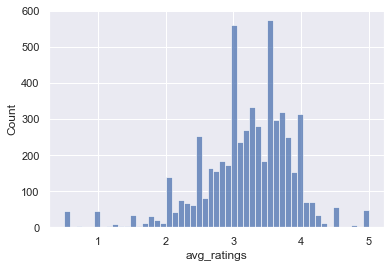

In [12]:
sns.histplot(df.avg_ratings)

In [13]:
df1 = pd.read_csv('./UserCount.txt', sep='\t', header= None)
df1.columns = ['user_id', 'num_ratings']
df1.head()

,user_id,num_ratings
0,1,11
1,10,13
2,100,2
3,1000,4
4,10000,2


In [14]:
df2 = pd.read_csv('./UserSum.txt', sep='\t', header= None)
df2.columns = ['user_id', 'sum_ratings']
df2.head()

,user_id,sum_ratings
0,1,44.5
1,10,55.0
2,100,6.5
3,1000,14.0
4,10000,8.0


In [15]:
df =  pd.merge(df1, df2, on= 'user_id')
df.head(2)

,user_id,num_ratings,sum_ratings
0,1,11,44.5
1,10,13,55.0


In [16]:
df['avg_ratings'] = df.apply(get_mean, axis= 1)
df.head(2)

,user_id,num_ratings,sum_ratings,avg_ratings
0,1,11,44.5,4.05
1,10,13,55.0,4.23


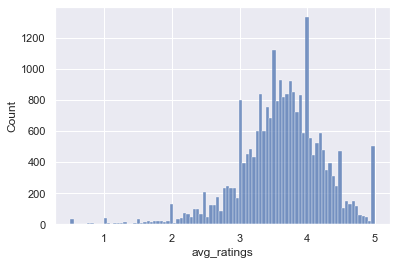

In [17]:
sns.histplot(df.avg_ratings)

In [18]:
len(df)

24342